In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.axis import Axis
import datetime as dt

#plt.style.use(['science', 'notebook'])
#%matplotlib inline


In [307]:
data_file = "conso.txt"

In [308]:
def read_text(filename):
    f = open(filename, "r")
    text = f.readlines()
    f.close()
    print(text)

def save_text(filename):
    f = open(filename, "w")
    f.write(text)
    f.close()


#read_text(data_file)
def get_data(filename):    
    data = pd.read_csv(filename)
    #data['time'] = pd.to_datetime(data['time'])  #.dt.tz_convert(None)
    #data.info()
    #print(data.tail(5))
    return data


In [309]:
text='test'
filename='text.txt'
#save_text(filename)

In [310]:
# read data with pandas
data = get_data(data_file)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Conso   1013 non-null   float64
dtypes: float64(1)
memory usage: 8.0 KB


In [311]:
data['interval']=3600/data['Conso']
data

,Conso,interval
0,0.19,18947.368421
1,0.19,18947.368421
2,0.19,18947.368421
3,0.19,18947.368421
4,0.19,18947.368421
...,...,...
1008,0.16,22500.000000
1009,0.16,22500.000000
1010,0.17,21176.470588
1011,0.17,21176.470588


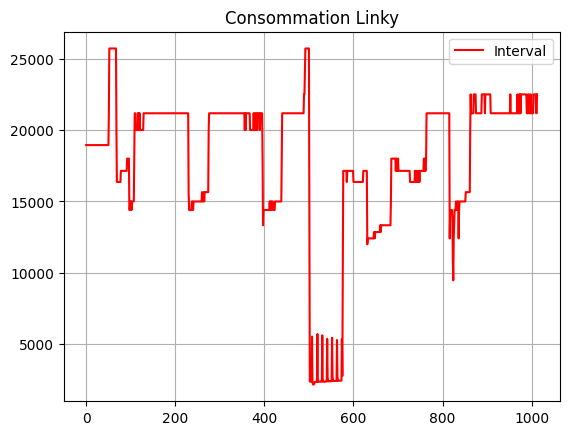

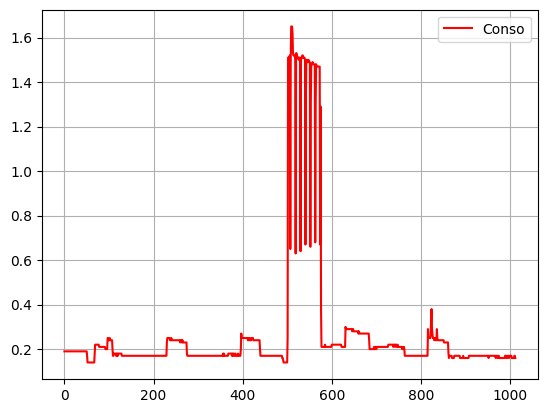

In [312]:

plt.title('Consommation Linky')
plt.plot(data['interval'], color='red',label='Interval')
plt.grid()
plt.legend()
plt.show()
plt.plot(data['Conso'], color='red',label='Conso')
plt.grid()
plt.legend()

### conso.csv sur WD6TB mis à jour avec PI4

In [313]:
def get_data2(filename):    
    data = pd.read_csv(filename, names=["Interval","kWh"])
    return data

In [314]:
old = False

if old:
    #conso_file = r"C:\Users\jean\Documents\conso.csv"
    conso_file = r"Y:\Documents\conso_old.csv"
    conso_file = r"Y:\Documents\conso - Copy (2).csv"
else:
    conso_file = r"Y:\Documents\conso.csv"
#old = False
conso_data = get_data2(conso_file)
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119625 entries, 0 to 119624
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Interval  119625 non-null  int64  
 1   kWh       119625 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 1.8 MB


In [315]:
conso_data = conso_data.dropna()
conso_data

,Interval,kWh
0,26289,0.14
1,26243,0.14
2,25885,0.14
3,25754,0.14
4,25774,0.14
...,...,...
119620,27732,0.13
119621,27670,0.13
119622,27365,0.13
119623,26915,0.13


<Axes: >

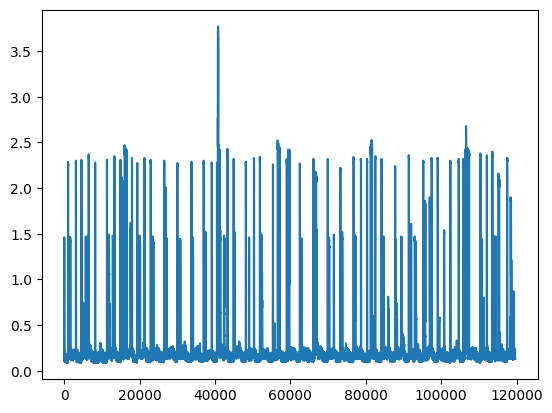

In [316]:
conso_data['kWh'].plot()

In [317]:
conso_data['sec']=conso_data['Interval']/1000
conso_data['Wh']=3600000/conso_data['Interval']
conso_data['cumul(ms)']=conso_data['Interval'].cumsum(axis=0)

conso_data

,Interval,kWh,sec,Wh,cumul(ms)
0,26289,0.14,26.289,136.939404,26289
1,26243,0.14,26.243,137.179438,52532
2,25885,0.14,25.885,139.076685,78417
3,25754,0.14,25.754,139.784111,104171
4,25774,0.14,25.774,139.675642,129945
...,...,...,...,...,...
119620,27732,0.13,27.732,129.813933,2825424517
119621,27670,0.13,27.670,130.104807,2825452187
119622,27365,0.13,27.365,131.554906,2825479552
119623,26915,0.13,26.915,133.754412,2825506467


In [318]:
# index dernier echantillon
l=len(conso_data)-1
l

119624

In [319]:
# cumtime = int(conso_data['cumul(ms)'].tail(1).values[0]*1000)
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2825533356000

In [320]:
from datetime import datetime, timedelta
now = datetime.now()
# conso.csv dynamique
base = now - timedelta(microseconds=cumtime)
base  # date de début


datetime.datetime(2024, 3, 7, 1, 39, 35, 181657)

In [321]:
old

False

In [322]:
if old:
    base = dt.datetime(2023, 8, 1, 10, 45, 0) - timedelta(microseconds=cumtime)

conso_data['dates'] = [base + dt.timedelta(microseconds=t*1000) for t in conso_data['cumul(ms)']]
conso_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119625 entries, 0 to 119624
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Interval   119625 non-null  int64         
 1   kWh        119625 non-null  float64       
 2   sec        119625 non-null  float64       
 3   Wh         119625 non-null  float64       
 4   cumul(ms)  119625 non-null  int64         
 5   dates      119625 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 5.5 MB


In [323]:
conso_data['days']= [d.strftime('%d/%m/%Y') for d in conso_data['dates']]    #[str(d.month)+'-'+str(d.day) for d in conso_data['dates']]
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:40:01.470657,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:40:27.713657,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:40:53.598657,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:41:19.352657,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:41:45.126657,07/03/2024
...,...,...,...,...,...,...,...
119620,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024
119621,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024
119622,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024
119623,26915,0.13,26.915,133.754412,2825506467,2024-04-08 18:31:21.648657,08/04/2024


In [324]:
#conso_data
conso_data.head(1),conso_data.tail(1)

(   Interval   kWh     sec          Wh  cumul(ms)                      dates  \
 0     26289  0.14  26.289  136.939404      26289 2024-03-07 01:40:01.470657   
 
          days  
 0  07/03/2024  ,
         Interval   kWh     sec          Wh   cumul(ms)  \
 119624     26889  0.13  26.889  133.883744  2825533356   
 
                             dates        days  
 119624 2024-04-08 18:31:48.537657  08/04/2024  )

In [325]:
# tranche journalière
now = datetime.now()
month = now.month
year = now.year
day = now.strftime('%d/%m/%Y')    #str(now.month)+'-'+str(now.day)
day, month, year

('08/04/2024', 4, 2024)

In [326]:
conso_data[conso_data['days']==day]

,Interval,kWh,sec,Wh,cumul(ms),dates,days
116704,28143,0.13,28.143,127.918132,2758851733,2024-04-08 00:00:26.914657,08/04/2024
116705,27187,0.13,27.187,132.416228,2758878920,2024-04-08 00:00:54.101657,08/04/2024
116706,26647,0.14,26.647,135.099636,2758905567,2024-04-08 00:01:20.748657,08/04/2024
116707,26881,0.13,26.881,133.923589,2758932448,2024-04-08 00:01:47.629657,08/04/2024
116708,27720,0.13,27.720,129.870130,2758960168,2024-04-08 00:02:15.349657,08/04/2024
...,...,...,...,...,...,...,...
119620,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024
119621,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024
119622,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024
119623,26915,0.13,26.915,133.754412,2825506467,2024-04-08 18:31:21.648657,08/04/2024


In [327]:
day

'08/04/2024'

In [328]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:40:01.470657,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:40:27.713657,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:40:53.598657,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:41:19.352657,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:41:45.126657,07/03/2024
...,...,...,...,...,...,...,...
119620,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024
119621,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024
119622,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024
119623,26915,0.13,26.915,133.754412,2825506467,2024-04-08 18:31:21.648657,08/04/2024


In [329]:
# group by day
grouped = conso_data[['days','kWh']].groupby('days', sort=False)
'''conso_graph=[]
for name, group in grouped:
    if name=='01/04/2024':print(group)
    #print("\n", name, len(group)/1000)
    conso_graph.append((name,len(group)/1000))'''
grouped


In [330]:
# count elements in each group => conso in watts => convert to kW
(grouped.count()/1000)

,kWh
days,
07/03/2024,3.160
08/03/2024,3.751
09/03/2024,3.083
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.534
14/03/2024,3.663
15/03/2024,3.561


In [331]:
# mean of all instant conso
total_mean = conso_data[['kWh']].mean()
total_mean


kWh    0.311625
dtype: float64

In [332]:
# mean by day from 07/03
mean=(grouped.count()/1000).mean()
mean

kWh    3.625
dtype: float64

In [333]:
filename='conso_par_jour.csv'
df = grouped.count()/1000
df.to_csv(filename)
filename='../conso_par_jour.csv'
df.to_csv(filename)

In [334]:
df.tail(7)

,kWh
days,
02/04/2024,3.820
03/04/2024,3.417
04/04/2024,3.478
05/04/2024,4.412
06/04/2024,3.404
07/04/2024,4.075
08/04/2024,2.921


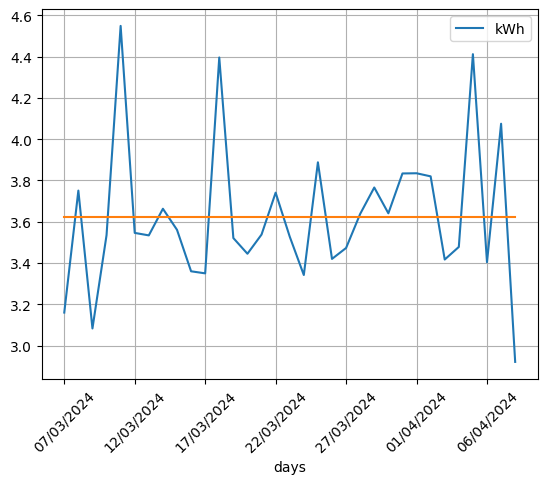

In [335]:
df.plot()#kind='bar')
plt.plot((0,len(df)-1),(mean,mean))
plt.xticks(rotation=45)
plt.grid()


In [336]:
#manuel
#day = '11/03/2024'


In [337]:
# conso day
conso_day = conso_data[conso_data['days']==day]
len(conso_day)

2921

In [338]:
conso_day

,Interval,kWh,sec,Wh,cumul(ms),dates,days
116704,28143,0.13,28.143,127.918132,2758851733,2024-04-08 00:00:26.914657,08/04/2024
116705,27187,0.13,27.187,132.416228,2758878920,2024-04-08 00:00:54.101657,08/04/2024
116706,26647,0.14,26.647,135.099636,2758905567,2024-04-08 00:01:20.748657,08/04/2024
116707,26881,0.13,26.881,133.923589,2758932448,2024-04-08 00:01:47.629657,08/04/2024
116708,27720,0.13,27.720,129.870130,2758960168,2024-04-08 00:02:15.349657,08/04/2024
...,...,...,...,...,...,...,...
119620,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024
119621,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024
119622,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024
119623,26915,0.13,26.915,133.754412,2825506467,2024-04-08 18:31:21.648657,08/04/2024


In [339]:
filename='conso_jour.csv'
conso_day.to_csv(filename)
filename='../conso_jour.csv'
conso_day.to_csv(filename)

In [340]:
df

,kWh
days,
07/03/2024,3.160
08/03/2024,3.751
09/03/2024,3.083
10/03/2024,3.535
11/03/2024,4.549
12/03/2024,3.546
13/03/2024,3.534
14/03/2024,3.663
15/03/2024,3.561


In [341]:
conso_day.head(1).dates, conso_day.tail(1).dates


(116704   2024-04-08 00:00:26.914657
 Name: dates, dtype: datetime64[ns],
 119624   2024-04-08 18:31:48.537657
 Name: dates, dtype: datetime64[ns])

In [342]:
conso_day.loc[:,'dates']

116704   2024-04-08 00:00:26.914657
116705   2024-04-08 00:00:54.101657
116706   2024-04-08 00:01:20.748657
116707   2024-04-08 00:01:47.629657
116708   2024-04-08 00:02:15.349657
                    ...            
119620   2024-04-08 18:29:59.698657
119621   2024-04-08 18:30:27.368657
119622   2024-04-08 18:30:54.733657
119623   2024-04-08 18:31:21.648657
119624   2024-04-08 18:31:48.537657
Name: dates, Length: 2921, dtype: datetime64[ns]

In [343]:
conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))
#=[x.hour for x in conso_day['dates']]
conso_day
df= conso_day.set_index('heure')
df

C:\Users\jean\AppData\Local\Temp\ipykernel_18848\2932063292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conso_day['heure']=conso_day.loc[:,'dates'].apply(lambda x: str(x.hour)+':'+str(x.minute) +':'+str(x.second))


,Interval,kWh,sec,Wh,cumul(ms),dates,days
heure,,,,,,,
0:0:26,28143,0.13,28.143,127.918132,2758851733,2024-04-08 00:00:26.914657,08/04/2024
0:0:54,27187,0.13,27.187,132.416228,2758878920,2024-04-08 00:00:54.101657,08/04/2024
0:1:20,26647,0.14,26.647,135.099636,2758905567,2024-04-08 00:01:20.748657,08/04/2024
0:1:47,26881,0.13,26.881,133.923589,2758932448,2024-04-08 00:01:47.629657,08/04/2024
0:2:15,27720,0.13,27.720,129.870130,2758960168,2024-04-08 00:02:15.349657,08/04/2024
...,...,...,...,...,...,...,...
18:29:59,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024
18:30:27,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024
18:30:54,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024


In [344]:
here = now.strftime('%H:%M:%S')
here, len(df)/1000

('18:31:52', 2.921)

In [345]:
df['kWh']

heure
0:0:26      0.13
0:0:54      0.13
0:1:20      0.14
0:1:47      0.13
0:2:15      0.13
            ... 
18:29:59    0.13
18:30:27    0.13
18:30:54    0.13
18:31:21    0.13
18:31:48    0.13
Name: kWh, Length: 2921, dtype: float64

In [346]:
conso_jour=len(df['kWh'])

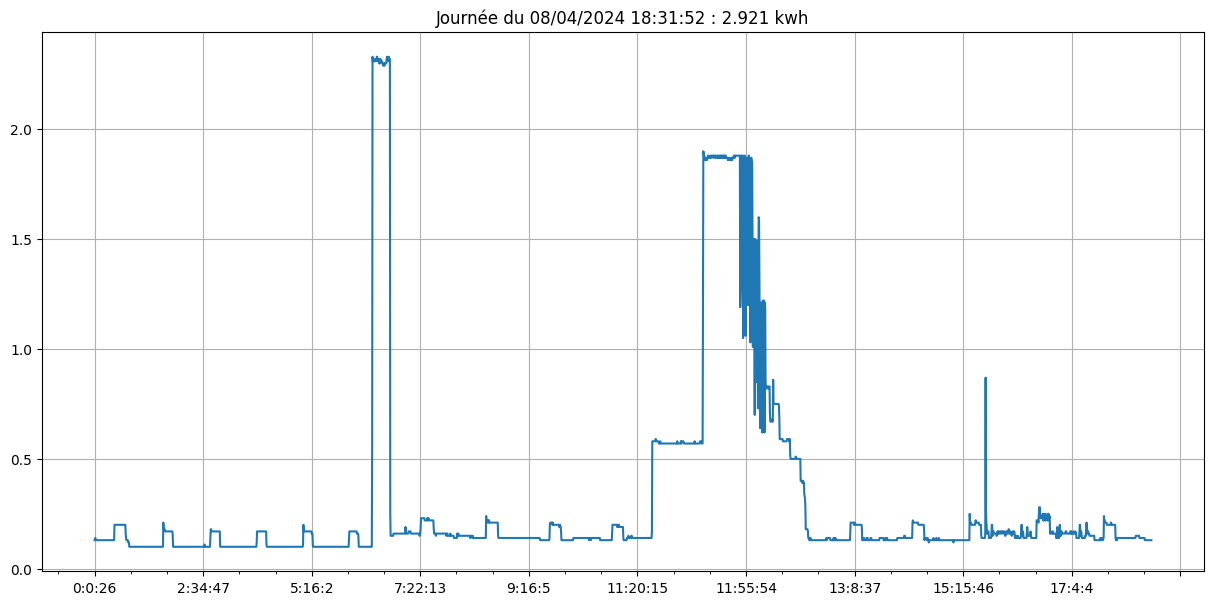

In [347]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# consommation d'une journée entière à partir de minuit
fig, ax = plt.subplots()
major_ticks=300;minor_ticks=100
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
# the size of A4 paper
fig.set_size_inches(15, 7)
plt.plot(df['kWh'])
#plt.plot(conso_day['heure'],conso_day['kWh'])
plt.title(f'Journée du {day} {here} : {conso_jour/1000} kwh')
plt.grid()

In [348]:
df['power']=[y for x,y in zip(df['Interval'],df['kWh'])]

In [349]:
df['power']

heure
0:0:26      0.13
0:0:54      0.13
0:1:20      0.14
0:1:47      0.13
0:2:15      0.13
            ... 
18:29:59    0.13
18:30:27    0.13
18:30:54    0.13
18:31:21    0.13
18:31:48    0.13
Name: power, Length: 2921, dtype: float64

<Axes: xlabel='heure'>

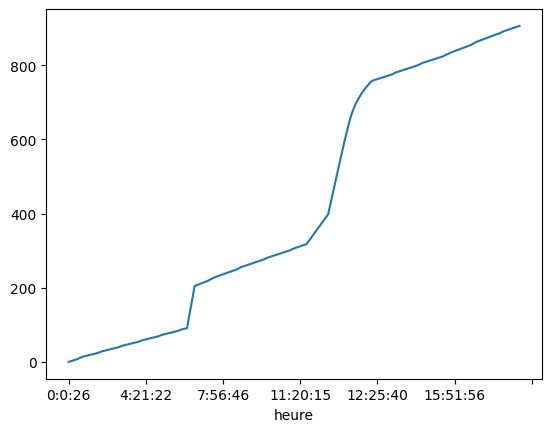

In [350]:
evo=df['power'].cumsum()
evo.plot()

435

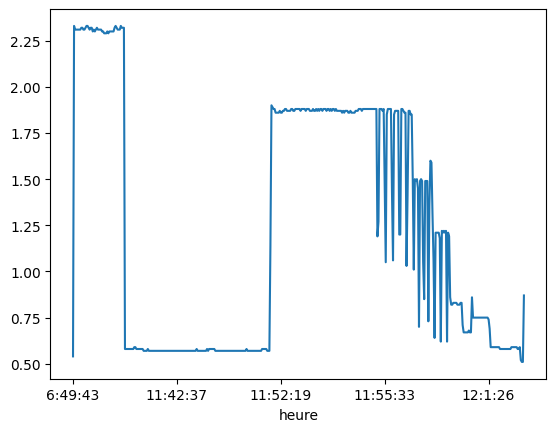

In [351]:
# bouilloire, microondes, four
filter=(.5<df['kWh'])
pic_high = df[filter]
pic_high['kWh'].plot()
len(pic_high)

1953

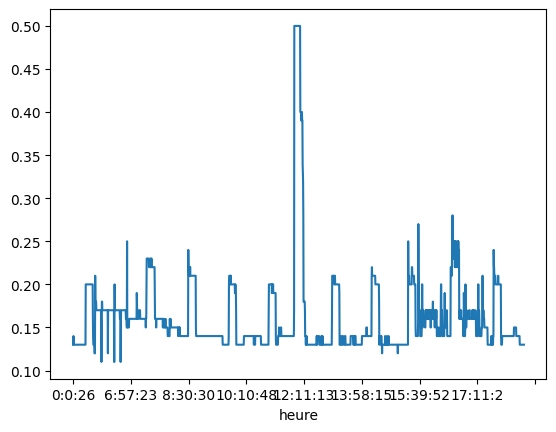

In [352]:
# frigo, moteur volet
pic_middle = df[(0.1<df['kWh']) & (df['kWh']<=.5)]
pic_middle['kWh'].plot()
len(pic_middle) # wh

2486

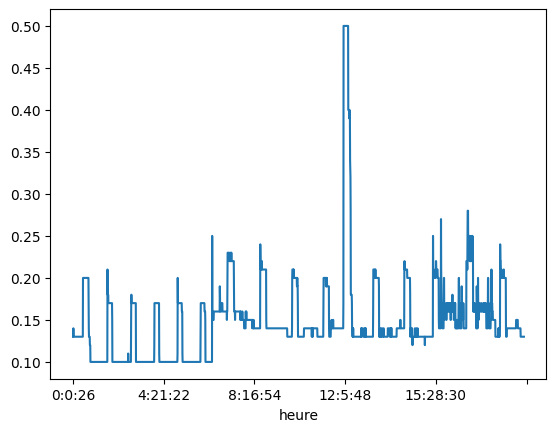

In [353]:
# pics frigo par jour
filter = (df['kWh']<=0.5)
pic_low = df[filter]
pic_low['kWh'].plot()
len(pic_low) # wh

In [354]:
time = conso_data['dates']
time


0        2024-03-07 01:40:01.470657
1        2024-03-07 01:40:27.713657
2        2024-03-07 01:40:53.598657
3        2024-03-07 01:41:19.352657
4        2024-03-07 01:41:45.126657
                    ...            
119620   2024-04-08 18:29:59.698657
119621   2024-04-08 18:30:27.368657
119622   2024-04-08 18:30:54.733657
119623   2024-04-08 18:31:21.648657
119624   2024-04-08 18:31:48.537657
Name: dates, Length: 119625, dtype: datetime64[ns]

In [355]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    #plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [356]:
if not old:
    major_ticks=1/60;minor_ticks=1/240  # plus de ticks, 4 fois plus de minor
    major_ticks=1/30;minor_ticks=1/120   # moins de ticks
    major_ticks=1/15;minor_ticks=1/60
    major_ticks=1/2;minor_ticks=1/8
else:
    major_ticks=4;minor_ticks=1   # encore moins si int


In [357]:
major_ticks=4;minor_ticks=1
major_ticks,minor_ticks

(4, 1)

## Main graph

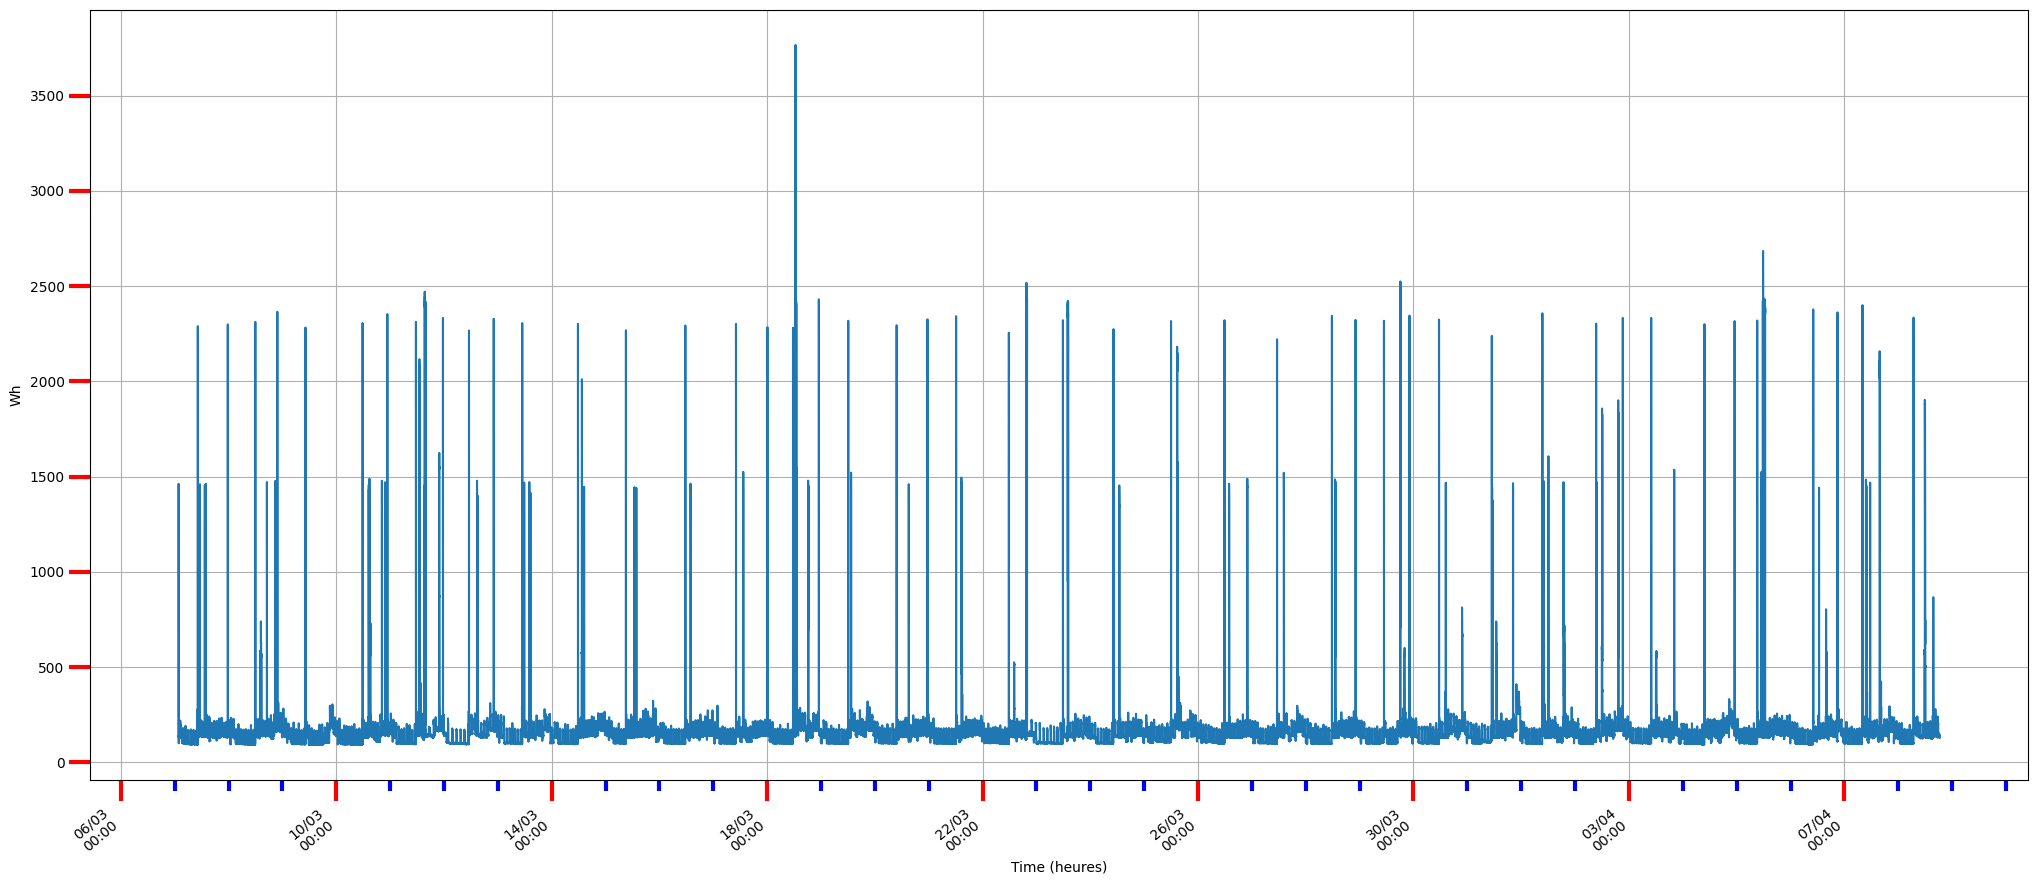

In [358]:

from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)

def show_graph():
    fig, ax = plt.subplots()
    # the size of A4 paper
    fig.set_size_inches(25, 10)

    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
    
    #formatter = DateFormatter('%d/%m\n%H:%M:%S')
    formatter = DateFormatter('%d/%m\n%H:%M')
    ax.xaxis.set_major_formatter(formatter)

    # ticks sur axe des x
    ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # major ticks tous les 15 min
    ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # minor ticks tous les 5 min
    ax.tick_params(which='both', width=3)
    ax.tick_params(which='major', length=15, color='r')
    ax.tick_params(which='minor', length=8, color='b')

    #plt.plot(conso_data['cumul(ms)']/3600000,conso_data['Wh'])
    plt.plot(time,conso_data['Wh'])
    plt.ylabel('Wh')
    plt.xlabel('Time (heures)')
    #format_date(10)
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')

    #fig.autofmt_xdate()
    
    plt.grid()
    plt.show()
show_graph()

In [359]:
cumul_conso = len(conso_data)
conso_data.tail(1)

,Interval,kWh,sec,Wh,cumul(ms),dates,days
119624,26889,0.13,26.889,133.883744,2825533356,2024-04-08 18:31:48.537657,08/04/2024


In [360]:
cumtime= int(conso_data._get_value(l,'cumul(ms)')*1000)
cumtime

2825533356000

# Slice of last 1 kWh

In [361]:
l = len(conso_data)  # total watt consommés
l

119625

In [362]:
k = 1
taille = k*1000  # fenetre k*1000 watt consommés
l,taille

(119625, 1000)

In [363]:
if l<1000:
    part = 1
else: part = 1/2
#taille = int(part*l)
taille

1000

In [364]:
data = conso_data.tail(taille)
len(data),data

(1000,
         Interval   kWh     sec          Wh   cumul(ms)  \
 118625      6073  0.59   6.073  592.787749  2802294983   
 118626      6887  0.52   6.887  522.723973  2802301870   
 118627      7169  0.50   7.169  502.162087  2802309039   
 118628      7203  0.50   7.203  499.791753  2802316242   
 118629      7185  0.50   7.185  501.043841  2802323427   
 ...          ...   ...     ...         ...         ...   
 119620     27732  0.13  27.732  129.813933  2825424517   
 119621     27670  0.13  27.670  130.104807  2825452187   
 119622     27365  0.13  27.365  131.554906  2825479552   
 119623     26915  0.13  26.915  133.754412  2825506467   
 119624     26889  0.13  26.889  133.883744  2825533356   
 
                             dates        days  
 118625 2024-04-08 12:04:30.164657  08/04/2024  
 118626 2024-04-08 12:04:37.051657  08/04/2024  
 118627 2024-04-08 12:04:44.220657  08/04/2024  
 118628 2024-04-08 12:04:51.423657  08/04/2024  
 118629 2024-04-08 12:04:58.608657  08

In [365]:
now = datetime.now()
# conso.csv dynamique
cumtime_start= int(conso_data._get_value(l-taille+1,'cumul(ms)')*1000) # conversion microseconds


In [366]:
cumtime_end= int(data._get_value(l-1,'cumul(ms)')*1000) # conversion microseconds


In [367]:
cumtime_end,cumtime_start

(2825533356000, 2802301870000)

In [368]:
#last_interval = int(data._get_value(l,'Interval')*1000) # conversion microseconds
delta_cumtime = cumtime_end - cumtime_start #+ last_interval
delta_cumtime

23231486000

In [369]:

base = now - timedelta(microseconds=delta_cumtime)
now,base, data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')


(datetime.datetime(2024, 4, 8, 18, 31, 59, 578975),
 datetime.datetime(2024, 4, 8, 12, 4, 48, 92975),
 '08/04/2024 18:31:48')

In [370]:
conso_data

,Interval,kWh,sec,Wh,cumul(ms),dates,days
0,26289,0.14,26.289,136.939404,26289,2024-03-07 01:40:01.470657,07/03/2024
1,26243,0.14,26.243,137.179438,52532,2024-03-07 01:40:27.713657,07/03/2024
2,25885,0.14,25.885,139.076685,78417,2024-03-07 01:40:53.598657,07/03/2024
3,25754,0.14,25.754,139.784111,104171,2024-03-07 01:41:19.352657,07/03/2024
4,25774,0.14,25.774,139.675642,129945,2024-03-07 01:41:45.126657,07/03/2024
...,...,...,...,...,...,...,...
119620,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024
119621,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024
119622,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024
119623,26915,0.13,26.915,133.754412,2825506467,2024-04-08 18:31:21.648657,08/04/2024


In [371]:
end = conso_data['dates'][l-1].strftime('%d/%m/%Y %H:%M:%S')
start = conso_data['dates'][l-taille+1].strftime('%d/%m/%Y %H:%M:%S')
start,end

('08/04/2024 12:04:37', '08/04/2024 18:31:48')

In [372]:
data.head(1)['dates'].to_string(index=False),data.tail(1)['dates'].to_string(index=False)

('2024-04-08 12:04:30.164657', '2024-04-08 18:31:48.537657')

In [373]:
k

1

In [374]:
data.Interval.tail(1000)

118625     6073
118626     6887
118627     7169
118628     7203
118629     7185
          ...  
119620    27732
119621    27670
119622    27365
119623    26915
119624    26889
Name: Interval, Length: 1000, dtype: int64

In [375]:
conversion_us_heure = 1/1000/60/60 
temps_1kWh = sum(data.Interval.tail(1000))*conversion_us_heure  #somme 1000 interval = temps conso 1 kWh
conso_jour = 24/temps_1kWh
heure = int(temps_1kWh)
mn = (temps_1kWh - heure)*60
sec = (mn - int(mn))*60
temps_1kWh, conso_jour,heure,int(mn),int(sec)

(6.456790555555556, 3.7170169596642566, 6, 27, 24)

In [376]:
data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')

C:\Users\jean\AppData\Local\Temp\ipykernel_18848\3458501435.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['heure']=conso_data['dates']#.strftime('%d/%m/%Y %H:%M:%S')


In [377]:
data

,Interval,kWh,sec,Wh,cumul(ms),dates,days,heure
118625,6073,0.59,6.073,592.787749,2802294983,2024-04-08 12:04:30.164657,08/04/2024,2024-04-08 12:04:30.164657
118626,6887,0.52,6.887,522.723973,2802301870,2024-04-08 12:04:37.051657,08/04/2024,2024-04-08 12:04:37.051657
118627,7169,0.50,7.169,502.162087,2802309039,2024-04-08 12:04:44.220657,08/04/2024,2024-04-08 12:04:44.220657
118628,7203,0.50,7.203,499.791753,2802316242,2024-04-08 12:04:51.423657,08/04/2024,2024-04-08 12:04:51.423657
118629,7185,0.50,7.185,501.043841,2802323427,2024-04-08 12:04:58.608657,08/04/2024,2024-04-08 12:04:58.608657
...,...,...,...,...,...,...,...,...
119620,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024,2024-04-08 18:29:59.698657
119621,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024,2024-04-08 18:30:27.368657
119622,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024,2024-04-08 18:30:54.733657
119623,26915,0.13,26.915,133.754412,2825506467,2024-04-08 18:31:21.648657,08/04/2024,2024-04-08 18:31:21.648657


<Axes: >

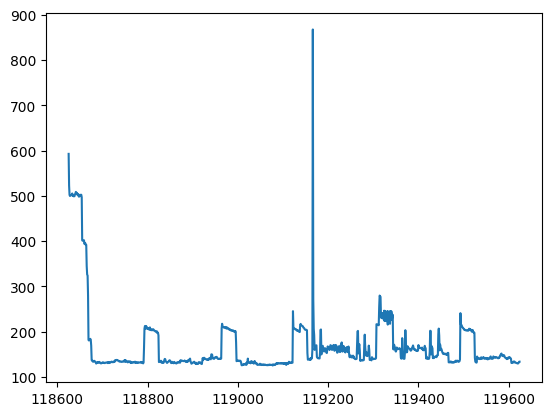

In [378]:
#data.tail(600)['Wh'].plot()
data['Wh'].plot()

In [379]:
data['Wh']

118625    592.787749
118626    522.723973
118627    502.162087
118628    499.791753
118629    501.043841
             ...    
119620    129.813933
119621    130.104807
119622    131.554906
119623    133.754412
119624    133.883744
Name: Wh, Length: 1000, dtype: float64

# k kW window graph

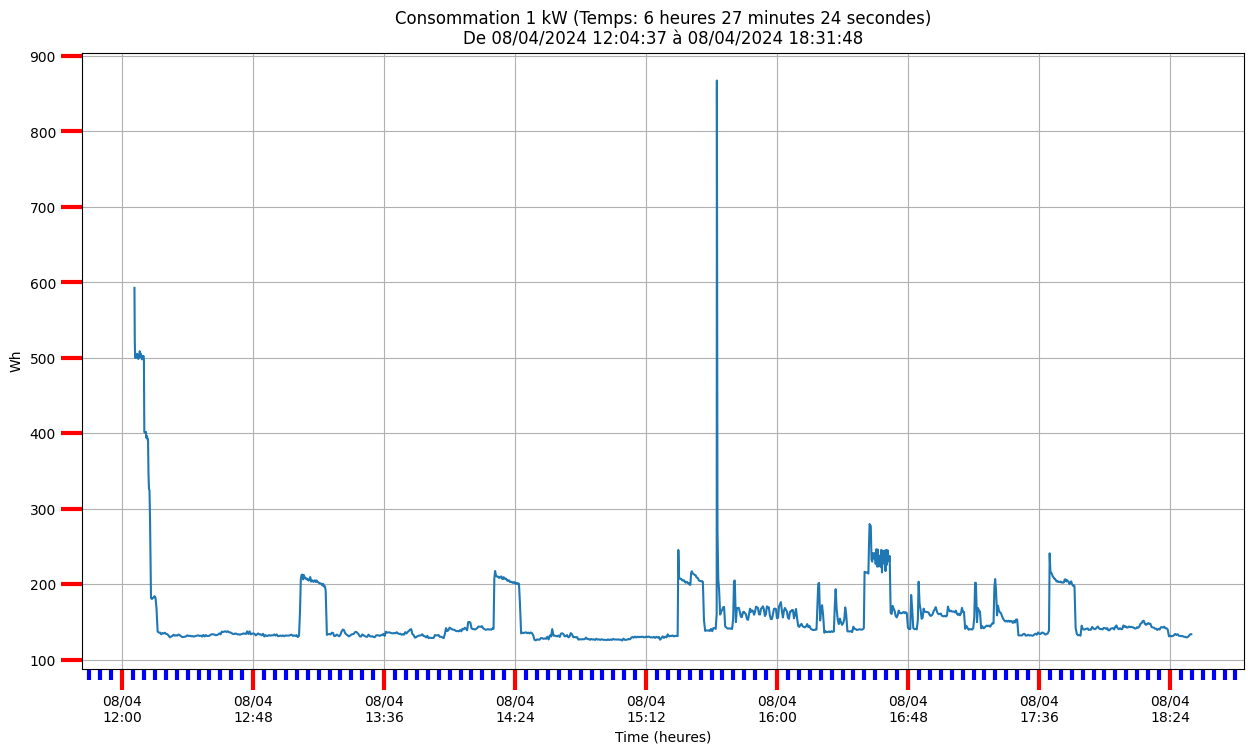

In [380]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15, 8)

formatter = DateFormatter('%d/%m\n%H:%M')
ax.xaxis.set_major_formatter(formatter)

# ticks sur axe des x
major_ticks=1/30;minor_ticks=1/360
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  # 1 major tick tous les 48 min
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # 1 minor ticks tous les 4 min
ax.tick_params(which='both', width=3)
ax.tick_params(which='major', length=15, color='r')
ax.tick_params(which='minor', length=8, color='b')

plt.title(f'Consommation {k} kW (Temps: {heure} heures {int(mn)} minutes {int(sec)} secondes)\nDe {start} à {end}')
plt.plot(data['dates'],data['Wh'])
plt.ylabel('Wh')
plt.xlabel('Time (heures)')
plt.grid()


<Axes: ylabel='Frequency'>

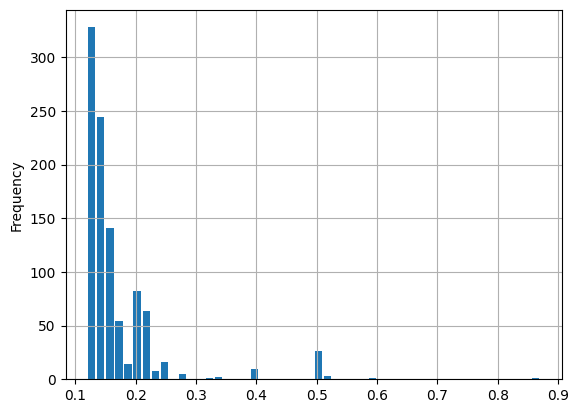

In [381]:
data.kWh.plot.hist(bins=50,rwidth=0.8,grid=True)


In [382]:
conso_data.tail()

,Interval,kWh,sec,Wh,cumul(ms),dates,days
119620,27732,0.13,27.732,129.813933,2825424517,2024-04-08 18:29:59.698657,08/04/2024
119621,27670,0.13,27.670,130.104807,2825452187,2024-04-08 18:30:27.368657,08/04/2024
119622,27365,0.13,27.365,131.554906,2825479552,2024-04-08 18:30:54.733657,08/04/2024
119623,26915,0.13,26.915,133.754412,2825506467,2024-04-08 18:31:21.648657,08/04/2024
119624,26889,0.13,26.889,133.883744,2825533356,2024-04-08 18:31:48.537657,08/04/2024


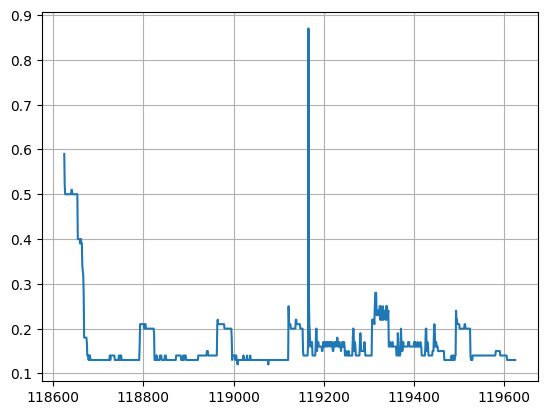

In [383]:
conso_data.tail(1000)['kWh'].plot()
plt.grid()

In [384]:
#plt.plot(conso_data['sec'])
now = dt.datetime.now()
last_cumul = np.array(conso_data['cumul(ms)'].tail(1))[0]*1000.0  # us
last_cumul, last_cumul/60e6  # min

(2825533356000.0, 47092.2226)

In [385]:
begin = now - dt.timedelta(microseconds=last_cumul)  #2023, 6, 24, 9, 14, (39, 942895) approximatif
now, begin

(datetime.datetime(2024, 4, 8, 18, 32, 3, 767135),
 datetime.datetime(2024, 3, 7, 1, 39, 50, 411135))

In [386]:
x = mdates.drange(begin,now,dt.timedelta(microseconds=1000000))  # seconds
len(conso_data),len(x),len(x)/3600

(119625, 2825534, 784.8705555555556)

In [387]:
def format_date(space=3):
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m\n%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(space))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=space))
    plt.gcf().autofmt_xdate()
    plt.grid()

In [388]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
base = dt.datetime(2005, 2, 1)
dates = [base + dt.timedelta(hours=(2 * i)) for i in range(732)]
N = len(dates)
N


732

In [389]:
732/12 # 60 jours

61.0

In [390]:
dates[0],dates[-1]

(datetime.datetime(2005, 2, 1, 0, 0), datetime.datetime(2005, 4, 2, 22, 0))

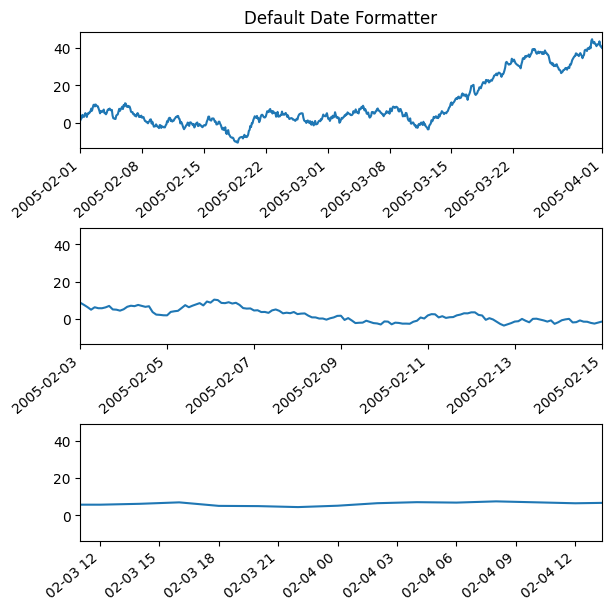

In [391]:
np.random.seed(19680801)
y = np.cumsum(np.random.randn(N))

fig, axs = plt.subplots(3, 1, layout='constrained', figsize=(6, 6))
lims = [(np.datetime64('2005-02'), np.datetime64('2005-04')),
        (np.datetime64('2005-02-03'), np.datetime64('2005-02-15')),
        (np.datetime64('2005-02-03 11:00'), np.datetime64('2005-02-04 13:20'))]
for nn, ax in enumerate(axs):
    ax.plot(dates, y)
    ax.set_xlim(lims[nn])
    # rotate_labels...
    for label in ax.get_xticklabels():
        label.set_rotation(40)
        label.set_horizontalalignment('right')
axs[0].set_title('Default Date Formatter')
plt.show()

In [392]:
t = dt.datetime(2005, 4, 2, 22, 0)
t

datetime.datetime(2005, 4, 2, 22, 0)